<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Segunda-práctica:-Aspectos-prácticos-de-las-redes-neuronales" data-toc-modified-id="Segunda-práctica:-Aspectos-prácticos-de-las-redes-neuronales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Segunda práctica: Aspectos prácticos de las redes neuronales</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Obtención-de-los-datos-y-pre-processing" data-toc-modified-id="Obtención-de-los-datos-y-pre-processing-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Obtención de los datos y pre-processing</a></span></li></ul></li></ul></li><li><span><a href="#Consideraciones-iniciales" data-toc-modified-id="Consideraciones-iniciales-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Consideraciones iniciales</a></span><ul class="toc-item"><li><span><a href="#Train-validation-test-split" data-toc-modified-id="Train-validation-test-split-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Train-validation-test split</a></span></li><li><span><a href="#Un-error-común-con-modelos-de-Keras" data-toc-modified-id="Un-error-común-con-modelos-de-Keras-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Un error común con modelos de Keras</a></span></li><li><span><a href="#Análisis-de-resultados" data-toc-modified-id="Análisis-de-resultados-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Análisis de resultados</a></span></li></ul></li><li><span><a href="#1.-Unidades-de-activación" data-toc-modified-id="1.-Unidades-de-activación-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1. Unidades de activación</a></span></li><li><span><a href="#2.-Inicialización-de-parámetros" data-toc-modified-id="2.-Inicialización-de-parámetros-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>2. Inicialización de parámetros</a></span></li><li><span><a href="#3.-Optimizadores" data-toc-modified-id="3.-Optimizadores-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>3. Optimizadores</a></span></li><li><span><a href="#4.-Regularización-y-red-final-(2.5-puntos)" data-toc-modified-id="4.-Regularización-y-red-final-(2.5-puntos)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>4. Regularización y red final <em>(2.5 puntos)</em></a></span><ul class="toc-item"><li><span><a href="#Evaluación-del-modelo-en-datos-de-test" data-toc-modified-id="Evaluación-del-modelo-en-datos-de-test-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Evaluación del modelo en datos de test</a></span></li></ul></li></ul></li></ul></div>

# Segunda práctica: Aspectos prácticos de las redes neuronales

En esta segunda parte, vamos a continuar desarrollando el problema de Fashion MNIST, con el objetivo de entender los aspectos prácticos del entrenamiento de redes neuronales.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**.

In [ ]:
# Puedes añadir todos los imports adicionales que necesites aquí
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt

#### Obtención de los datos y pre-processing

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

## Consideraciones iniciales

### Train-validation-test split

En todos los modelos que entrenemos, vamos a partir los datos de training (x_train) en dos sets: training y validación. De este modo, al final tendremos tres datasets distintos: training, validation, y test. Esta es una estrategia común en el aprendizaje automático, en la que los datos de test (o held-out data) se
"esconden" hasta el final. Los datos de validación se utilizan para estimar cómo de bien están funcionando nuestros modelos y para observar si estamos cayendo en overfitting. Esto nos permite cambiar hiperparámetros y probar distintas arquitecturas **sabiendo que no estamos utilizando información del test set para "optimizar" los resultados en éste** (si eligiéramos nuestro mejor modelo en base a los resultados de test, estaríamos "haciendo trampas", ya que se ha utilizado la información contenida en éste para elegir el modelo y las métricas reportadas serían optimistas).

Para utilizar un split training-validation data durante el entrenamiento, podemos partir nosotros mismos los datos o dejar que Keras lo haga. Podéis ver cómo hacer estas particiones en la documentación de *fit*.

**Requisito: En todos los entrenamientos de esta práctica, se requiere utilizar el 20% de los datos en x_train como  conjunto de datos de validación**

### Un error común con modelos de Keras

En esta práctica entrenaremos varios modelos para comparar resultados. Un error común en Keras es no instanciar un nuevo modelo cada vez que hacemos un nuevo entrenamiento. Al hacer

*model = Sequential()*

*model.add(lo que sea)  # Definición del modelo*

*model.fit()*

si queremos entrenar un nuevo modelo o el mismo modelo otra vez, es necesario volver a inicializar el modelo con model = Sequential(). Si olvidamos este paso y volvemos a hacer fit(), el modelo seguirá entrenando por donde se quedó en el último fit().

### Análisis de resultados

A la hora de escribir las respuestas y los análisis pedidos, es importante presentar las conclusiones de manera adecuada a partir de lo visto en nuestros experimentos. Los Jupyter Notebook son una herramienta imprescindible para *data scientists* e ingenieros de Machine Learning para presentar los resultados, incluyendo soporte para incluir gráficas y elementos visuales. Podéis explicar vuestras observaciones del modo que consideréis adecuado, si bien recomendamos la utilización de gráficas para evaluar los entrenamientos y comparar resultados.

Como ayuda, las siguientes funciones pueden resultar interesantes a la hora de evaluar resultados. Todas ellas utilizan el objeto *history* que podéis obtener como salida del método *fit()* de Keras:

history = model.fit(x_train, y_train, ...)

Por supuesto, podéis modificarlas y utilizarlas como prefiráis para crear vuestros propios informes.

In [ ]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1,
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()

def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['acc'], color="green")
    plt.plot(history1.history['val_acc'], 'r--', color="green")
    plt.plot(history2.history['acc'], color="blue")
    plt.plot(history2.history['val_acc'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1,
                'Train ' + name2, 'Val ' + name2],
               loc='lower right')
    plt.show()

# Nota: podéis cambiar los números aquí presentes y ejecutar esta línea si queréis cambiar el tamaño
# de las gráficas
# matplotlib.rcParams['figure.figsize'] = [8, 8]


## 1. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Las funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 1 *(2.5 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

#1 Carga y Preparacion de Datos

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Cargar el dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalizar
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encoding
train_labels_cat = keras.utils.to_categorical(train_labels)
test_labels_cat = keras.utils.to_categorical(test_labels)

# Nombres de clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#2 Creando Modelos

In [5]:
def crear_modelo(capas, neuronas):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    for _ in range(capas):
        model.add(layers.Dense(neuronas, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


#3 Entrenando los Modelos

In [9]:
# Lista para guardar el historial de entrenamiento
modelos = []
historicos = []

estructuras = [
    (3, 128),  # 3 capas densas de 128 neuronas
    (4, 64),   # 4 capas densas de 64 neuronas
    (5, 32)    # 5 capas densas de 32 neuronas
]

for i, (capas, neuronas) in enumerate(estructuras):
    print(f"\nEntrenando Modelo {i+1} con {capas} capas densas de {neuronas} neuronas...")
    modelo = crear_modelo(capas, neuronas)
    history = modelo.fit(train_images, train_labels_cat,
                         validation_split=0.2,
                         epochs=10,
                         verbose=0)
    modelos.append(modelo)
    historicos.append(history)
    print("Entrenamiento finalizado.")

# Modelo con activación sigmoid
def crear_modelo_sigmoid(capas, neuronas):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    for _ in range(capas):
        model.add(layers.Dense(neuronas, activation='sigmoid'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Entrenar modelo sigmoid (3 capas densas, 128 neuronas)
print("\nEntrenando Modelo con sigmoid (3 capas de 128 neuronas)...")
modelo_sigmoid = crear_modelo_sigmoid(3, 128)
history_sigmoid = modelo_sigmoid.fit(train_images, train_labels_cat,
                                     validation_split=0.2,
                                     epochs=10,
                                     verbose=0)
print("Entrenamiento finalizado.")



Entrenando Modelo 1 con 3 capas densas de 128 neuronas...
Entrenamiento finalizado.

Entrenando Modelo 2 con 4 capas densas de 64 neuronas...
Entrenamiento finalizado.

Entrenando Modelo 3 con 5 capas densas de 32 neuronas...
Entrenamiento finalizado.

Entrenando Modelo con sigmoid (3 capas de 128 neuronas)...
Entrenamiento finalizado.


#4 Graficas por modelo

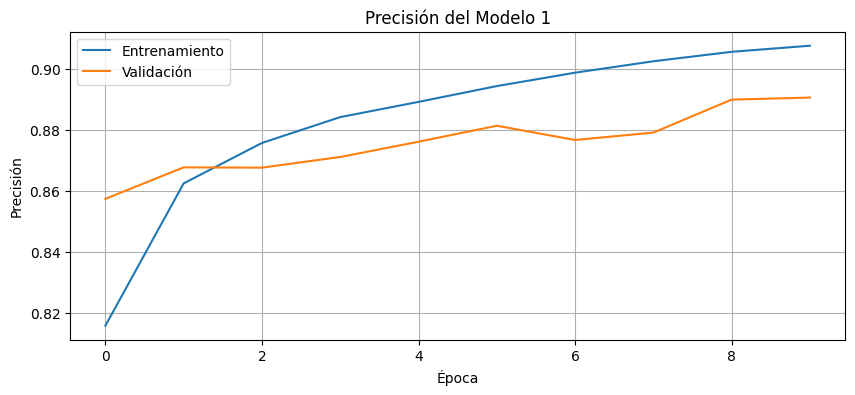

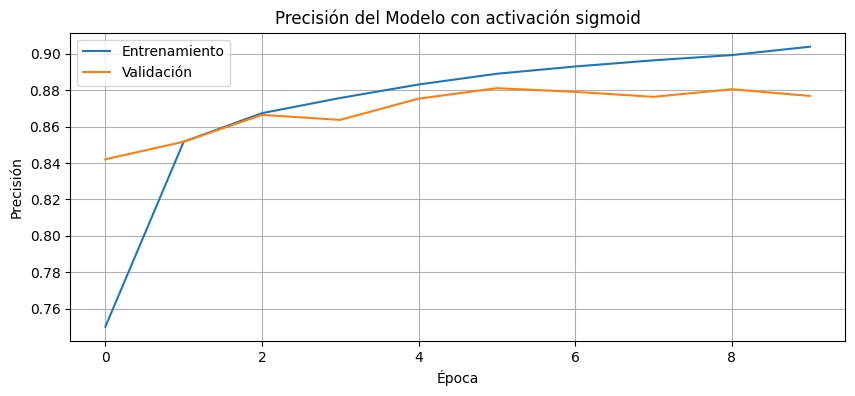

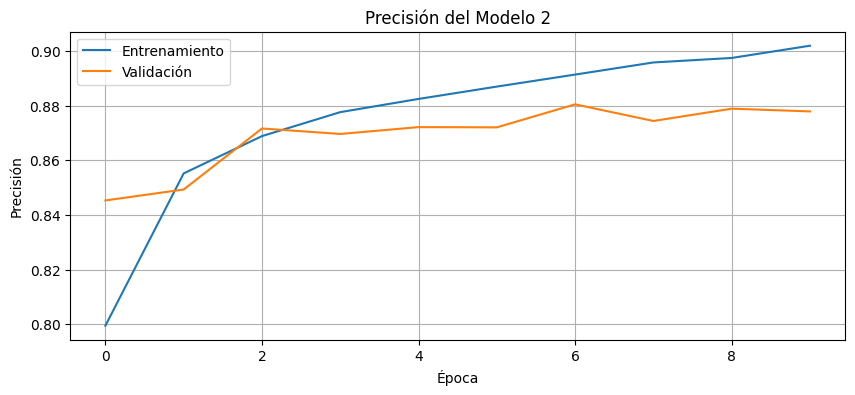

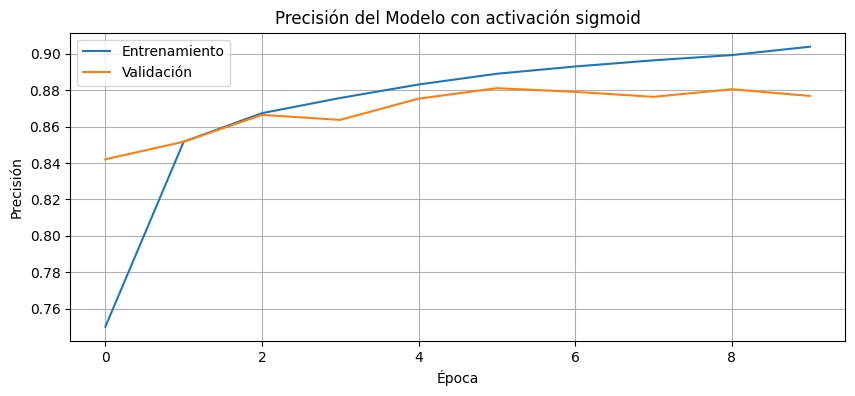

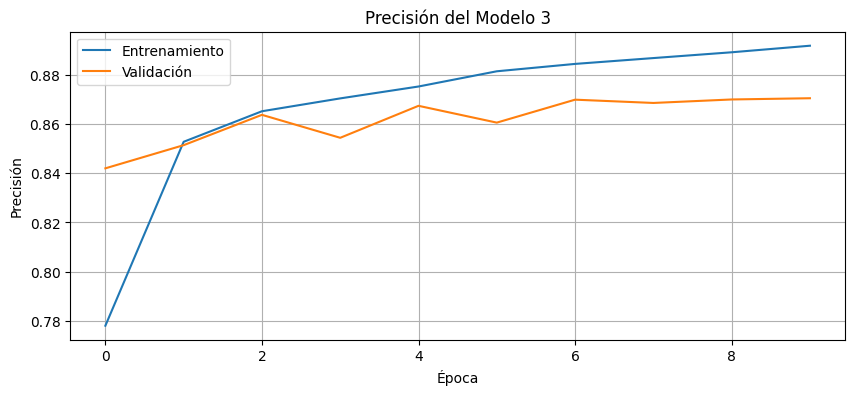

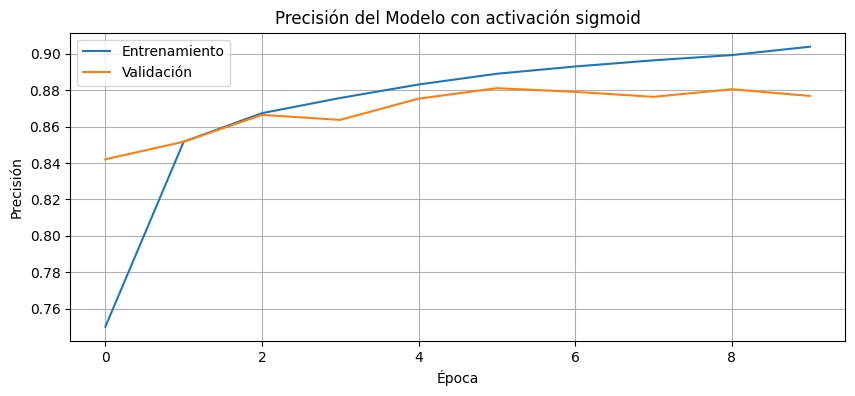

In [10]:
for i, history in enumerate(historicos):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title(f'Precisión del Modelo {i+1}')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)
    plt.show()


# Graficar precisión del modelo sigmoid
    plt.figure(figsize=(10, 4))
    plt.plot(history_sigmoid.history['accuracy'], label='Entrenamiento')
    plt.plot(history_sigmoid.history['val_accuracy'], label='Validación')
    plt.title('Precisión del Modelo con activación sigmoid')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)
    plt.show()


#5 Comparando Modelos

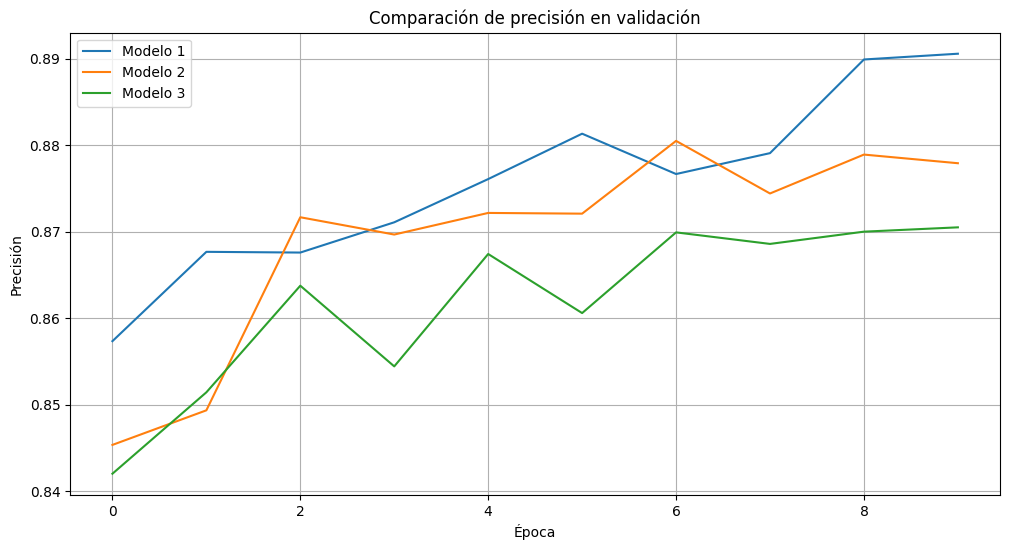

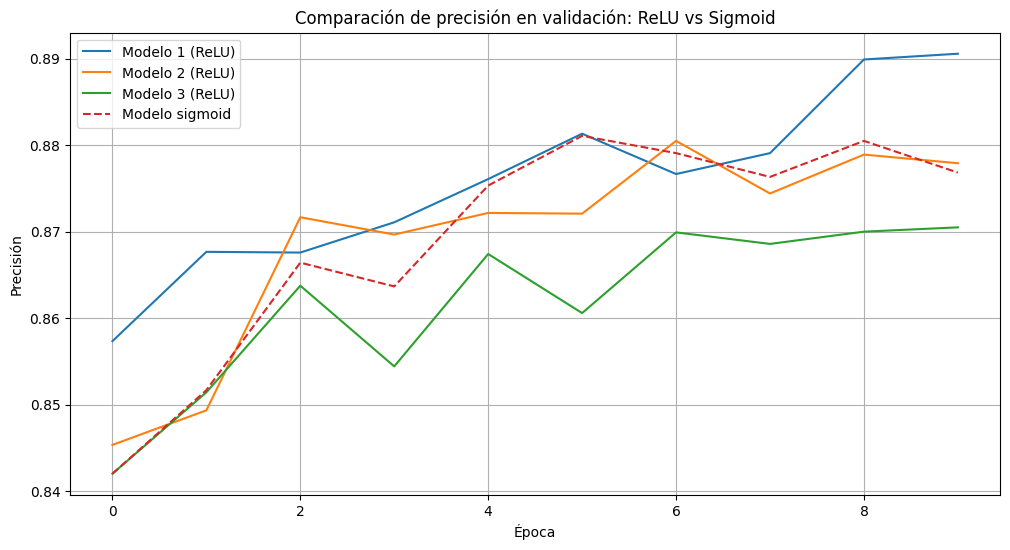

In [11]:
plt.figure(figsize=(12, 6))
for i, history in enumerate(historicos):
    plt.plot(history.history['val_accuracy'], label=f'Modelo {i+1}')
plt.title('Comparación de precisión en validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# Comparación entre ReLU y sigmoid
plt.figure(figsize=(12, 6))
for i, history in enumerate(historicos):
    plt.plot(history.history['val_accuracy'], label=f'Modelo {i+1} (ReLU)')
plt.plot(history_sigmoid.history['val_accuracy'], label='Modelo sigmoid', linestyle='--')
plt.title('Comparación de precisión en validación: ReLU vs Sigmoid')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()



## 2. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 2 *(2.5 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

#1 Carga de librerias y datoas

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, initializers
import matplotlib.pyplot as plt

# Cargar el dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0

#2 Crear el Modelo de Inicializacion

In [13]:
def crear_modelo(inicializador):
    model = keras.Sequential()
    model.add(layers.Dense(128, activation='relu', kernel_initializer=inicializador, input_shape=(784,)))
    model.add(layers.Dense(64, activation='relu', kernel_initializer=inicializador))
    model.add(layers.Dense(10, activation='softmax'))  # salida
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

#3 Otros Modelos Distintos de Inicializacion



In [14]:
# Inicialización con ceros
modelo_zeros = crear_modelo(initializers.Zeros())

# Inicialización con distribución normal
modelo_normal = crear_modelo(initializers.RandomNormal(mean=0.0, stddev=0.05))

# Inicialización por defecto
modelo_glorot = crear_modelo(initializers.GlorotUniform())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#4 Entrenamiento de Modelos

In [15]:
hist_zeros = modelo_zeros.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)
hist_normal = modelo_normal.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)
hist_glorot = modelo_glorot.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)

#5 Grafica y Comparativa

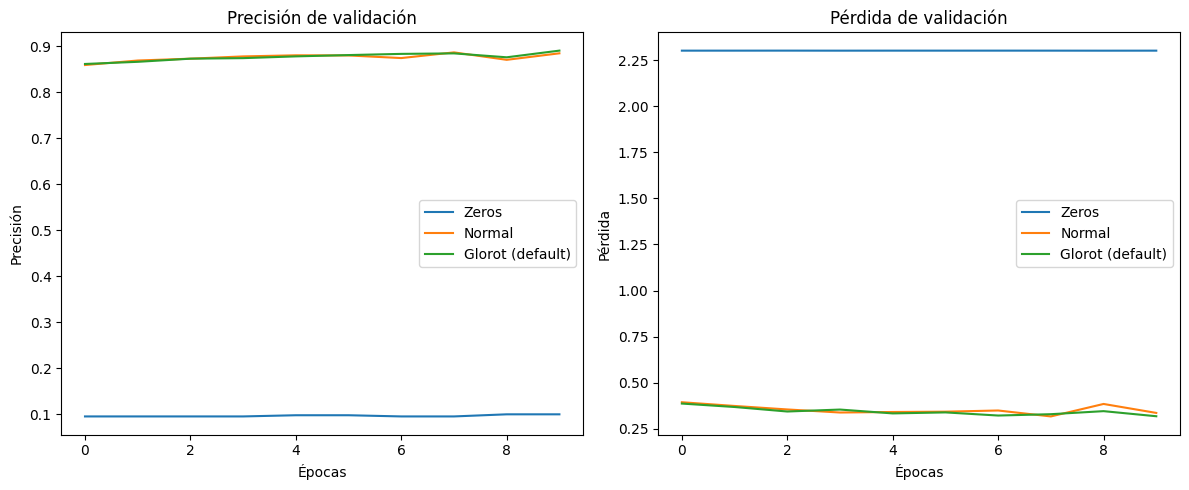

In [16]:
plt.figure(figsize=(12,5))

# Gráfica de precisión
plt.subplot(1,2,1)
plt.plot(hist_zeros.history['val_accuracy'], label='Zeros')
plt.plot(hist_normal.history['val_accuracy'], label='Normal')
plt.plot(hist_glorot.history['val_accuracy'], label='Glorot (default)')
plt.title('Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1,2,2)
plt.plot(hist_zeros.history['val_loss'], label='Zeros')
plt.plot(hist_normal.history['val_loss'], label='Normal')
plt.plot(hist_glorot.history['val_loss'], label='Glorot (default)')
plt.title('Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

#6 Conclusiones

## **Análisis:**

- **Inicialización con ceros:** No funcionan correctamente, ya que todos los pesos son iguales y hace que solo se repita el mismo conocimiento a la vez y no pbtenga diferentes resultados
  
- **Inicialización aleatoria normal:** Mejora mucho a diferencia de la de ceros, pero el problema seria cuadno detecte datos que son o demasiado pequeños o muy grandes

- **Inicialización Glorot (por defecto):** Es la mejor opcion y da mejores resultados en perdida y precision de datos.

## 3. Optimizadores

**Ejercicio 3 *(2.5 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

#1 Creamos la inicializacion GlorotUniform

In [ ]:
def crear_modelo_optimizador(inicializador, optimizador):
    model = keras.Sequential()
    model.add(layers.Dense(128, activation='relu', kernel_initializer=inicializador, input_shape=(784,)))
    model.add(layers.Dense(64, activation='relu', kernel_initializer=inicializador))
    model.add(layers.Dense(10, activation='softmax'))  # salida
    model.compile(optimizer=optimizador, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

#2 Probando Modelos Optimizadores

In [ ]:
# Crear modelos optimizadores
modelo_sgd = crear_modelo_optimizador(initializers.GlorotUniform(), keras.optimizers.SGD())
modelo_adam = crear_modelo_optimizador(initializers.GlorotUniform(), keras.optimizers.Adam())
modelo_rmsprop = crear_modelo_optimizador(initializers.GlorotUniform(), keras.optimizers.RMSprop())

#3 Entrenamiento de Modelos

In [ ]:
# Entrenamiento de los modelos
hist_sgd = modelo_sgd.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)
hist_adam = modelo_adam.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)
hist_rmsprop = modelo_rmsprop.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=0)

#4 Grafica y Comparativa

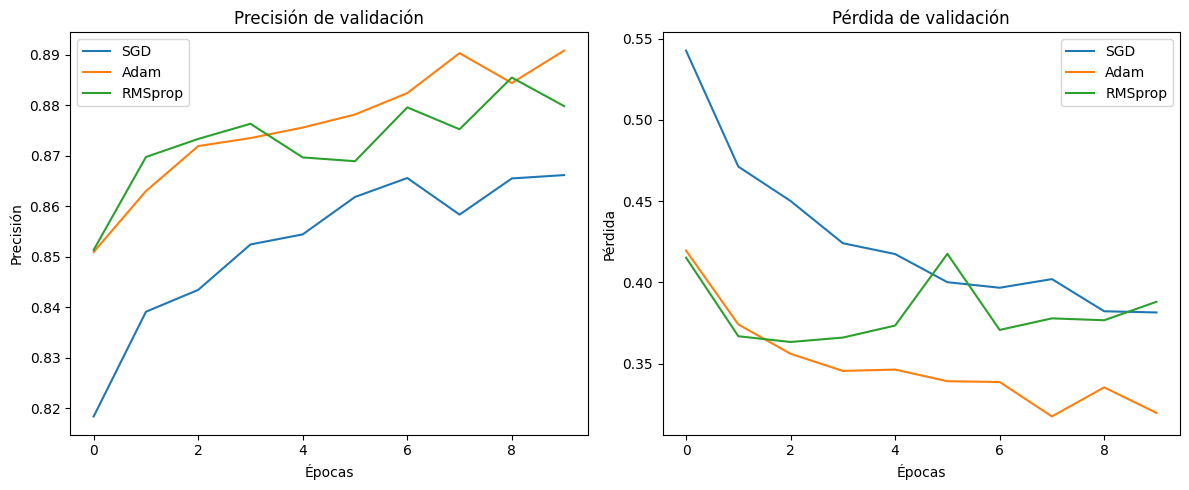

In [ ]:
plt.figure(figsize=(12,5))

# Gráfica de precisión
plt.subplot(1,2,1)
plt.plot(hist_sgd.history['val_accuracy'], label='SGD')
plt.plot(hist_adam.history['val_accuracy'], label='Adam')
plt.plot(hist_rmsprop.history['val_accuracy'], label='RMSprop')
plt.title('Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1,2,2)
plt.plot(hist_sgd.history['val_loss'], label='SGD')
plt.plot(hist_adam.history['val_loss'], label='Adam')
plt.plot(hist_rmsprop.history['val_loss'], label='RMSprop')
plt.title('Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

#5 Conclusion

**SGD:** Es bueno, pero lento, es util cuando se desea tener mayor control para el entrenamiento y ver la tasa de aprendizaje resultante

**Adam:** Ofrece el mejor desempeño en cuanto a precision y estabilidad. Aprender rapidamente y se adapta facilmente a cualquier tipo  de datos

**RMSprop:** Similar a Adam, pero al final llego a presentar un poco de imprecision


## 4. Regularización y red final *(2.5 puntos)*

**Ejercicio 4.1**: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

#1 Definiendo el Modelo

In [17]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Dropout

def crear_modelo_regularizado():
    model = keras.Sequential()

    # Capa de entrada
    model.add(layers.Dense(128, activation='relu', input_shape=(784,),
                           kernel_regularizer=regularizers.l2(0.001)))  # Regularización L2
    model.add(BatchNormalization())  # Normalización por lotes

    # Capa oculta 1
    model.add(layers.Dense(128, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)))  # Regularización L2
    model.add(Dropout(0.3))  # Dropout para reducir overfitting
    model.add(BatchNormalization())  # Normalización por lotes

    # Capa oculta 2
    model.add(layers.Dense(64, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)))  # Regularización L2
    model.add(Dropout(0.3))  # Dropout para reducir overfitting
    model.add(BatchNormalization())  # Normalización por lotes

    # Capa de salida
    model.add(layers.Dense(10, activation='softmax'))  # 10 clases para Fashion MNIST

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


#2 Evitamos el overfitting

In [18]:
# Callback para EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#3 Entramiento del Modelo

In [19]:
# Crear y entrenar el modelo regularizado
modelo_regularizado = crear_modelo_regularizado()

hist_regularizado = modelo_regularizado.fit(
    x_train, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7021 - loss: 1.2550 - val_accuracy: 0.7964 - val_loss: 0.7842
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8157 - loss: 0.7508 - val_accuracy: 0.8092 - val_loss: 0.6498
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8267 - loss: 0.6471 - val_accuracy: 0.8407 - val_loss: 0.5590
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8323 - loss: 0.6014 - val_accuracy: 0.8176 - val_loss: 0.6112
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8421 - loss: 0.5655 - val_accuracy: 0.8482 - val_loss: 0.5151
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8415 - loss: 0.5477 - val_accuracy: 0.8300 - val_loss: 0.5848
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8434 - loss: 0.5494 - val_accuracy: 0.8320 - val_loss: 0.5426
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8444 - loss: 0

#4 Grafica del Resultado

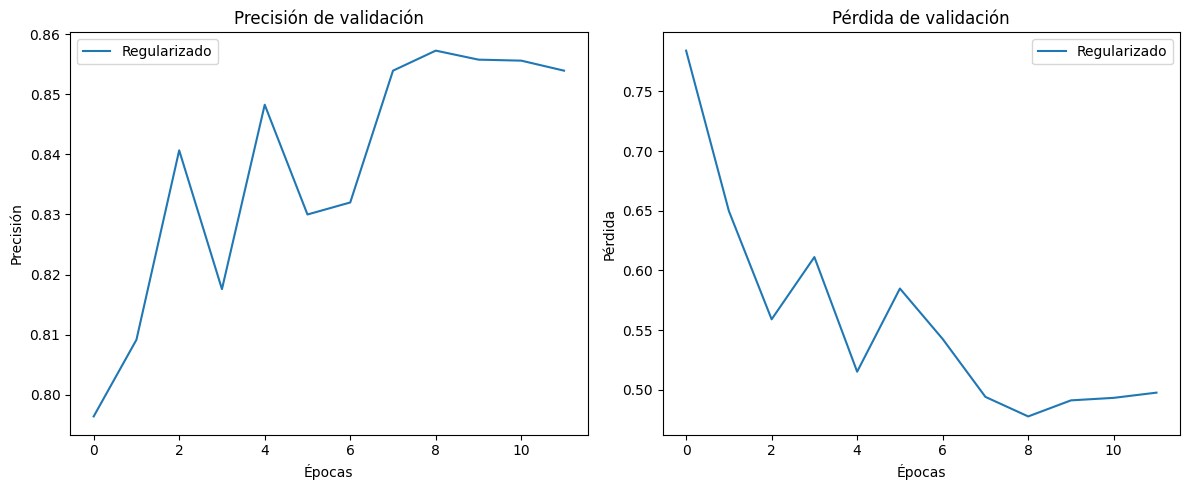

Accuracy en el set de test: 84.65%


In [22]:
plt.figure(figsize=(12,5))

# Gráfica de precisión
plt.subplot(1,2,1)
plt.plot(hist_regularizado.history['val_accuracy'], label='Regularizado')
plt.title('Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1,2,2)
plt.plot(hist_regularizado.history['val_loss'], label='Regularizado')
plt.title('Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluación en el conjunto de test
test_loss, test_accuracy = modelo_regularizado.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy en el set de test: {test_accuracy * 100:.2f}%")

### Evaluación del modelo en datos de test

Una vez elegido el que creemos que es nuestro mejor modelo a partir de la estimación que hemos visto en los datos de validación, es hora de utilizar los datos de test para ver cómo se comporta nuestro modelo ante nuevos datos. Si hemos hecho bien las cosas, este número debería ser parecido al valor de nuestra estimación vista en los datos de validación.

**Pregunta 4.2**. Utilizando nuestro mejor modelo, obtener la accuracy resultante en el dataset de test. Comentar este resultado.

**Conclusion:**

Al evaluar el modelo se obtuvo una Accuracy en el set de test: 84.65%. El cual es un resultado muy cercano al visto en el conjunto de validacion, lo cual indica que esta bien entrenado para generalizar y no solo memorizarlo y aunque no llegamos a un Accuracy de 90%, tuvimos buenos resultados al aplicar diferentes tecnicas como lo fueron la regularización, dropout, normalización y early stopping para evitar el sobreajuste. En general, el modelo responde bien y estable frente a resultados nuevos.
